In [1]:
!pip install -U scipy 
!pip install -U numba 
!pip install -U numpy 
!pip install -U jinja2 
!pip install -U pandas
!pip install -U matplotlib 
!pip install -U seaborn 
!pip install -U scikit-learn 
!pip install imbalanced-learn -q 
!pip install shap -q 
!pip install phik -q

In [2]:
def setup_environment():
    required_packages = {
        'phik': 'phik',
        'shap': 'shap',
        'sklearn': 'scikit-learn'
    }
    
    for import_name, package_name in required_packages.items():
        try:
            __import__(import_name)
            print(f"{package_name} уже установлен")
        except ImportError:
            print(f"⏳ Устанавливаем {package_name}...")
            !pip install -q {package_name}
            print(f"{package_name} успешно установлен")
    
    print("\nВсе зависимости готовы к работе!")

# Вызов функции при старте ноутбука
setup_environment()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/conda/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.9/site-packages/ipykernel/kerne

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/conda/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.9/site-packages/ipykernel/kerne

AttributeError: _ARRAY_API not found

phik уже установлен
shap уже установлен
scikit-learn уже установлен

Все зависимости готовы к работе!


!pip install -U scipy 
!pip install -U numba 
!pip install -U numpy 
!pip install -U jinja2 
!pip install -U pandas
!pip install -U matplotlib 
!pip install -U seaborn 
!pip install -U scikit-learn 
!pip install imbalanced-learn -q 
!pip install shap -q 
!pip install phik -q

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (RandomizedSearchCV,
                                     train_test_split)
from sklearn.preprocessing import (OneHotEncoder,
                                   OrdinalEncoder,
                                   RobustScaler, 
                                   MinMaxScaler, 
                                   StandardScaler,
                                   LabelEncoder,
                                   FunctionTransformer)
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import phik
from phik import phik_matrix
import shap
import scipy
from urllib.request import urlopen
from io import StringIO
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.base import TransformerMixin, BaseEstimator


In [4]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           1.2.0
alembic                           1.6.5
anyio                             3.2.1
argon2-cffi                       20.1.0
astunparse                        1.6.3
async-generator                   1.10
attrs                             21.2.0
Babel                             2.9.1
backcall                          0.2.0
backports.functools-lru-cache     1.6.4
beautifulsoup4                    4.9.3
bleach                            3.3.0
blinker                           1.4
blis                              0.7.8
branca                            0.5.0
brotlipy                          0.7.0
cachetools                        5.2.0
catalogue                         2.0.8
catboost                          1.0.3
certifi                           2022.6.15
certipy                           0.1.3
cffi                              1.14.5
chardet             

# Описание проекта

**HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли.**

**У нас будет несколько задач.**
- `Первая` — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.
- `Вторая` — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Предоставленные данные.**
- `train_job_satisfaction_rate.csv` - входные признаки тренировачной выборка для 1 задачи;
- `test_target_job_satisfaction_rate.csv` - целевой признак тренировочной выборки для 1 задачи;
- `train_quit.csv` - входные признаки тренировачной выборка для 2 задачи;
- `test_target_quit.csv` - целевой признак тренировочной выборки для 2 задачи;
- `test_features.csv` - тестовые входные признаки для обеих задач.

**Входные признаки у обеих задач совпадают, разнится лишь целевой:**

- `id` - уникальный идентификатор сотрудника;
- `dept` - отдел, в котором работает сотрудник;
- `level` - уровень занимаемой должности;
- `workload` - уровень загруженности сотрудника;
- `employment_years` - длительность работы в компании (в годах);
- `last_year_promo` - показывает, было ли повышение за последний год;
- `last_year_violations` - показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluatio` - оценка качества работы сотрудника, которую дал руководитель;
- `salary` - ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` - уровень удовлетворённости сотрудника работой в компании, целевой признак 1 задачи;
- `quit` - увольнение сотрудника из компании, целевой признак 2 задачи.

# Загрузка данных

**Взглянем на первые 5 строк каждого датафрейма.**

In [5]:
file_paths = {
    'train_job_satisfaction_rate': [
        'train_job_satisfaction_rate.csv',                          # локальный путь
        '/datasets/train_job_satisfaction_rate.csv',                # серверный путь
        'https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv'  # URL
    ],
    'test_features': [
        'test_features.csv',                                        # локальный путь
        '/datasets/test_features.csv',                              # серверный путь
        'https://code.s3.yandex.net/datasets/test_features.csv'     # URL
    ],
    'test_target_job_satisfaction_rate': [
        'test_target_job_satisfaction_rate.csv',                    # локальный путь
        '/datasets/test_target_job_satisfaction_rate.csv',          # серверный путь
        'https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv'  # URL
    ],
    'train_quit': [
        'train_quit.csv',                                           # локальный путь
        '/datasets/train_quit.csv',                                 # серверный путь
        'https://code.s3.yandex.net/datasets/train_quit.csv'        # URL
    ],
    'test_target_quit': [
        'test_target_quit.csv',                                     # локальный путь
        '/datasets/test_target_quit.csv',                           # серверный путь
        'https://code.s3.yandex.net/datasets/test_target_quit.csv'  # URL
    ]
}

def find_and_read_csv(filename, **kwargs):
    for path in file_paths[filename]:
        try:
            if path.startswith('http'):
                with urlopen(path) as response:
                    data = response.read().decode('utf-8')
                # Для URL-файлов сначала загружаем без индекса, затем проверяем наличие 'id'
                temp_df = pd.read_csv(StringIO(data), **kwargs)
                if 'id' in temp_df.columns:
                    temp_df.set_index('id', inplace=True)
                return temp_df
            elif os.path.exists(path):
                # Для локальных файлов сначала пробуем с index_col, затем проверяем
                try:
                    return pd.read_csv(path, index_col='id', **kwargs)
                except KeyError:
                    temp_df = pd.read_csv(path, **kwargs)
                    if 'id' in temp_df.columns:
                        temp_df.set_index('id', inplace=True)
                    return temp_df
        except Exception as e:
            print(f"Ошибка при обработке {path}: {str(e)}")
            continue
    
    print(f"Файл {filename} не найден ни по одному из путей: {file_paths[filename]}")
    return None

# Чтение файлов
df_train_1 = find_and_read_csv('train_job_satisfaction_rate')
df_test_1 = find_and_read_csv('test_target_job_satisfaction_rate')
df_train_2 = find_and_read_csv('train_quit')
df_test_2 = find_and_read_csv('test_target_quit')
df_test_all = find_and_read_csv('test_features')

In [6]:
df_train_1.head()    #тренировочные данные для 1 задачи

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


In [7]:
df_test_1.head()    #целевой признак для 1 задачи

,job_satisfaction_rate
id,
130604,0.74
825977,0.75
418490,0.60
555320,0.72
826430,0.08


In [8]:
df_train_2.head()    #тренировочные данные для 2 задачи

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


In [9]:
df_test_2.head()    #целевой признак для 2 задачи

,quit
id,
999029,yes
372846,no
726767,no
490105,no
416898,yes


In [10]:
df_test_all.head()    #общие тренировочные данные

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


**Готово, теперь перейдём к предобработке.**

# Предобработка данных

**Так как признаки для двух задач одинаковые, предобработку сделаем вместе по одному принципу.**

**Но перед этим заменим значения `sinior` на `senior` во всех датафреймах.**

In [11]:
df_train_1['level'] = df_train_1['level'].replace({'sinior': 'senior'})
df_train_2['level'] = df_train_2['level'].replace({'sinior': 'senior'})
df_test_all['level'] = df_test_all['level'].replace({'sinior': 'senior'})

## Тренировочные данные

### Пропуски

In [12]:
df_train_1.info()
df_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   ob

**Есть пропуски в тренировочных данных для 1 задачи(заполним их в пайплайне):**
- пропуски в `dept` заполним модой;
- пропуски в `level` заполним модой.

### Дубликаты

**Избавимся от всех дубликатов, так как модель будет обучаться на одних и тех же данных.**

In [13]:
print(f'Количество дубликатов в df_train_1: {df_train_1.duplicated().sum()}')
print(f'Количество дубликатов в df_train_2: {df_train_2.duplicated().sum()}')

df_train_1.drop_duplicates(inplace=True)
df_train_2.drop_duplicates(inplace=True);

Количество дубликатов в df_train_1: 245
Количество дубликатов в df_train_2: 1413


## Тестовые данные

### Пропуски

In [14]:
df_test_1.info()
df_test_2.info()
df_test_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 130604 to 648995
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo    

**Так же есть пропуски в тех же стобцах, что и в тренировочных данных, ещё мы заметили пустое значение в столбце `dept`, заполним всё пайпайне.**

# Задача 1 - удовлетворенность сотрудника

## Исследовательский анализ

### Тренировочные данные

**Взглянем на распределения каждого признака в тренировочном датафрейме.**

#### Количественные признаки

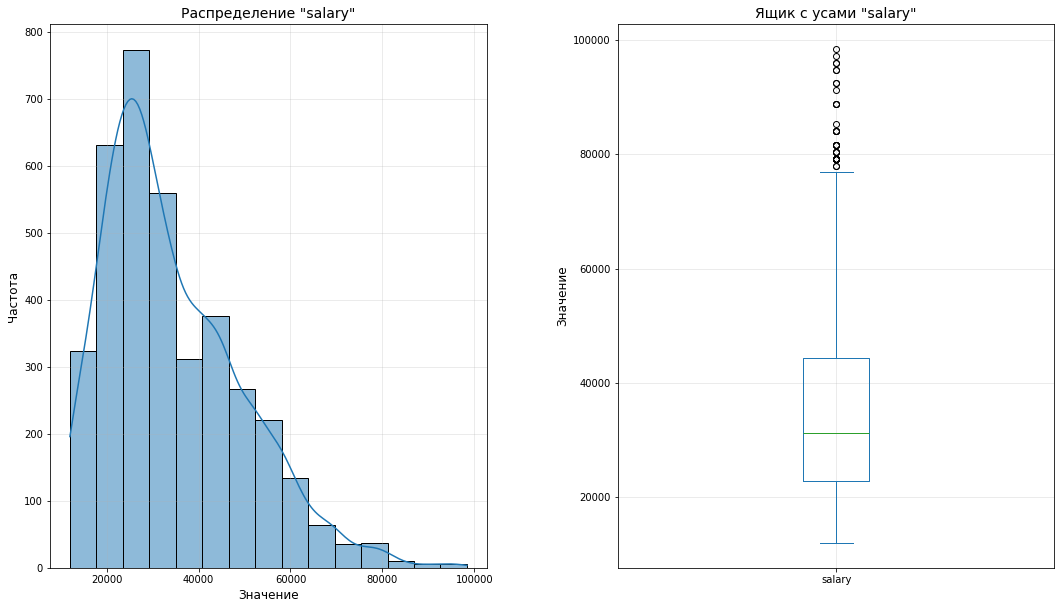

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

def plot_continuous(data, column, ax, bins):   #функция для непрерывных признаков
    sns.histplot(data[column], bins=bins, kde=True, ax=ax)
    ax.set_title(f'Распределение "{column}"', fontsize=14)
    ax.set_xlabel('Значение', fontsize=12)
    ax.set_ylabel('Частота', fontsize=12)
    ax.grid(alpha=0.3)

plot_continuous(df_train_1, 'salary', axes[0], 15)

df_train_1[['salary']].plot.box(ax=axes[1], vert=True)
axes[1].set_title(f'Ящик с усами "salary"', fontsize=14)
axes[1].set_ylabel('Значение', fontsize=12)
axes[1].grid(alpha=0.3)

plt.show()

**Медианное значение ЗП - `31000`, после 80000 уже идут большие значения, но от них избавляться не стоит.**

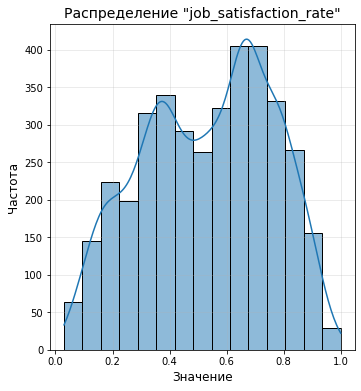

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.delaxes(axes[1])

plot_continuous(df_train_1, 'job_satisfaction_rate', axes[0], 15)

**Видно две вершины, но большее количество сотрудников довольны.**

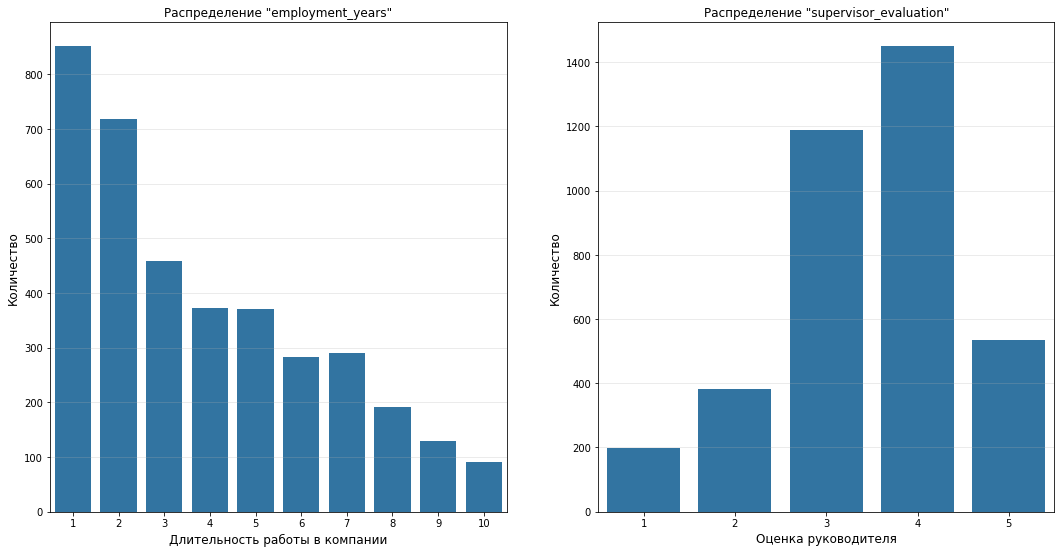

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

def plot_discrete(data, column, ax, top_n=None):  #функция для дискретных признаков
    sns.countplot(x=data[column], ax=ax) 
    ax.set_title(f'Распределение "{column}"', fontsize=12)
    ax.set_ylabel('Количество', fontsize=12)
#   ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

plot_discrete(df_train_1, 'employment_years', axes[0])
axes[0].set_xlabel('Длительность работы в компании', fontsize=12)
plot_discrete(df_train_1, 'supervisor_evaluation', axes[1])
axes[1].set_xlabel('Оценка руководителя', fontsize=12);

- Большинство сотрудников не долго находятся в компании: `1-3 года`;
- Самая частая оценка руководителя: `3-4`.

#### Категоиральные признаки

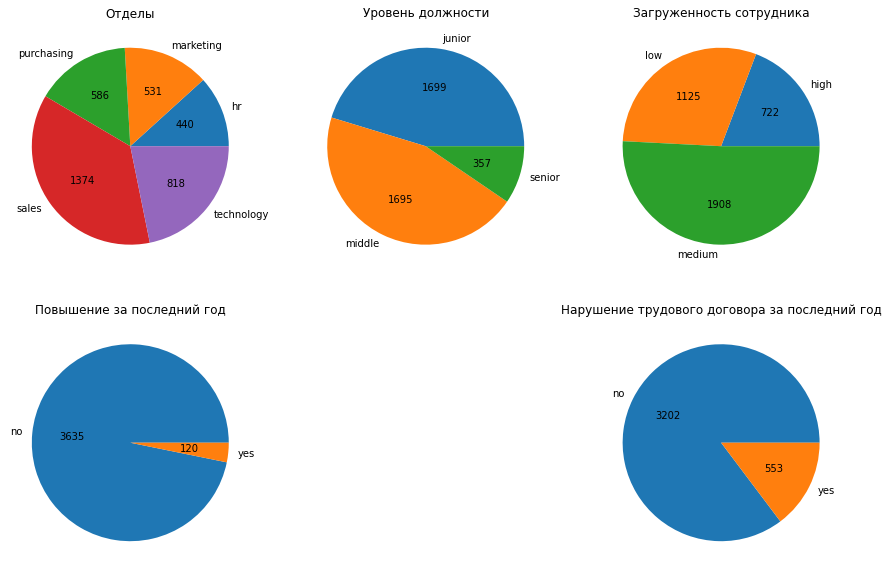

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.delaxes(axes[1, 1])

def pie_plot(df, column, ax):
    df_gr = df.groupby(column)[column].count()
    df_gr.plot(kind='pie',
               ylabel=(''),
               autopct=lambda x: '{:.0f}'.format(x * sum(df_gr.values)/100),
               ax=ax)

pie_plot(df_train_1, 'dept', axes[0, 0])
axes[0, 0].set_title('Отделы')
pie_plot(df_train_1, 'level', axes[0, 1])
axes[0, 1].set_title('Уровень должности')
pie_plot(df_train_1, 'workload', axes[0, 2])
axes[0, 2].set_title('Загруженность сотрудника')
pie_plot(df_train_1, 'last_year_promo', axes[1, 0])
axes[1, 0].set_title('Повышение за последний год')
pie_plot(df_train_1, 'last_year_violations', axes[1, 2])
axes[1, 2].set_title('Нарушение трудового договора за последний год');

- Самый большой отдел: `sales`:
- В основном в компании `middle` и `junior`:
- Большинство сотрудников загружены на уровне `medium`:
- Из 3716 сотрудников за последний год повышение получили лишь `118` человек;
- `550` человек за последний год нарушили трудовой договор.

**Портрет среднестатистического сотрудника: ЗП - `31000`, доволен работой, находится в штате `1-3 года`, имеет оценку руководителя `3-4`, работает в отделе `sales` на должности `middle` или `junior`, загружен на уровне `medium`, за последний год `не получал повышения` и `не нарушал трудовой договор`.**

#### Корреляционный анализ

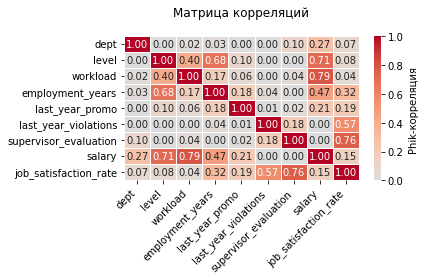

In [19]:
col_num_continuous = ['salary', 'job_satisfaction_rate']

pm = df_train_1.phik_matrix(interval_cols=col_num_continuous)
sns.heatmap(
    pm, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    center=0,
    vmin=0, 
    vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Phik-корреляция'}
)

plt.title('Матрица корреляций', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Очень высокой корреляции(> 80%) между признаками не наблюдается, но есть близкие к данному значению, от них избавляться в любом случае не будем.**

### Тестовые данные

**Теперь проведём исследовательский анализ тестовым данных, взглянем, насколько они отличаются от тренировочных.**

In [20]:
df_all = df_test_all.join(df_test_1)
df_all = df_all.join(df_test_2)
df_all.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
686555,hr,junior,medium,1,no,no,4,30000,0.72,no
467458,sales,middle,low,5,no,no,4,19200,0.64,no


#### Количественные признаки

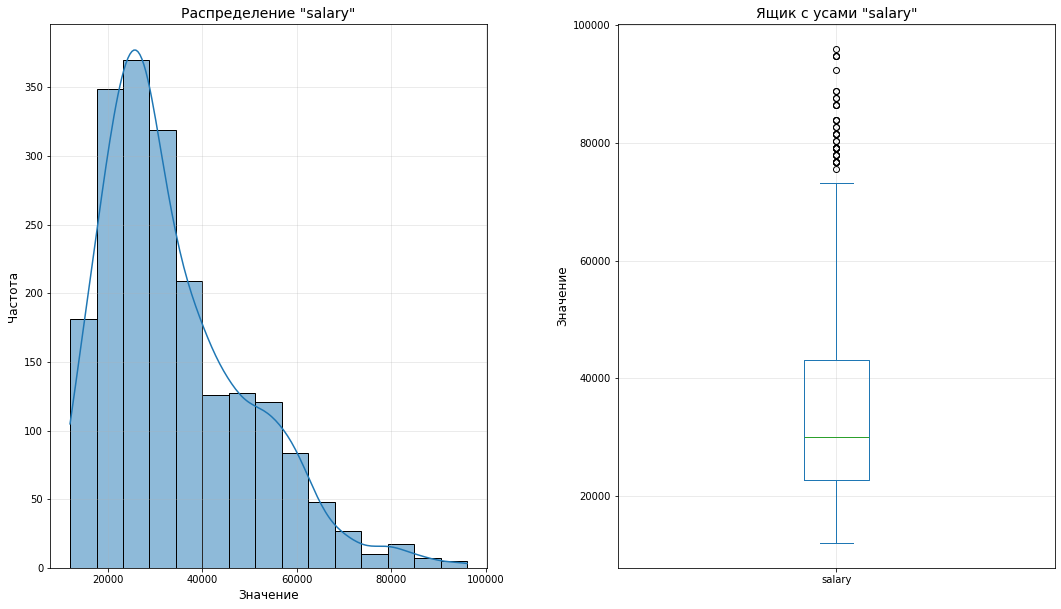

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plot_continuous(df_all, 'salary', axes[0], 15)
#plot_continuous(df_train_1, 'job_satisfaction_rate', axes[1], 15)

df_all[['salary']].plot.box(ax=axes[1], vert=True)
axes[1].set_title(f'Ящик с усами "salary"', fontsize=14)
axes[1].set_ylabel('Значение', fontsize=12)
axes[1].grid(alpha=0.3)

plt.show()

**Медианное значение ЗП - `30000`. На `1000` меньше, чем в тренировочных данных.**

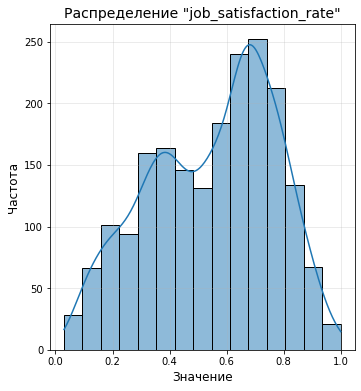

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.delaxes(axes[1])

plot_continuous(df_all, 'job_satisfaction_rate', axes[0], 15)

**Так же видно две вершины, но в тестовые данные в большем количестве находятся на второй половине.**

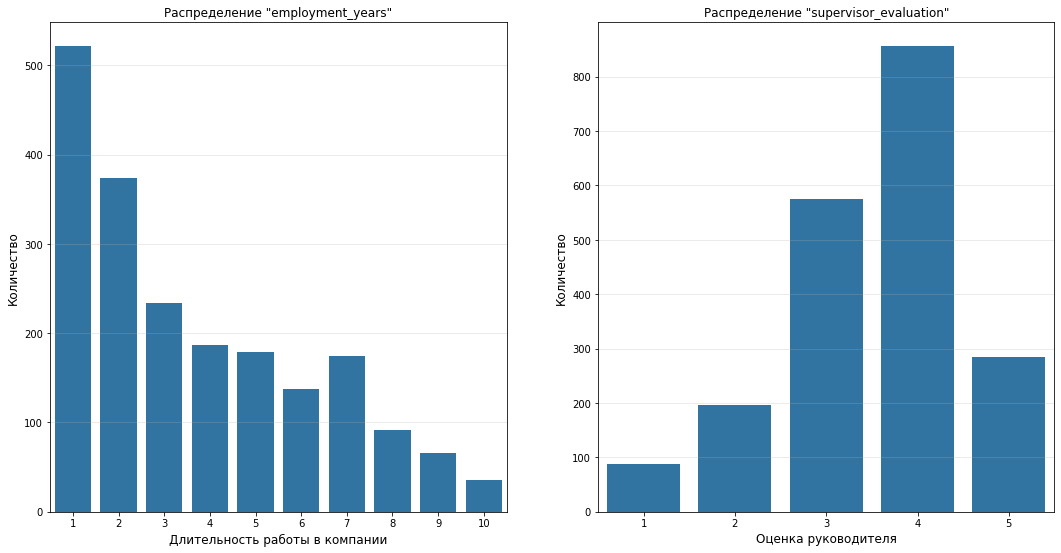

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

plot_discrete(df_all, 'employment_years', axes[0])
axes[0].set_xlabel('Длительность работы в компании', fontsize=12)
plot_discrete(df_all, 'supervisor_evaluation', axes[1])
axes[1].set_xlabel('Оценка руководителя', fontsize=12);

**Так же всё похоже, но в в тестовых данных больше оценок `4`.**

#### Категориальные признаки

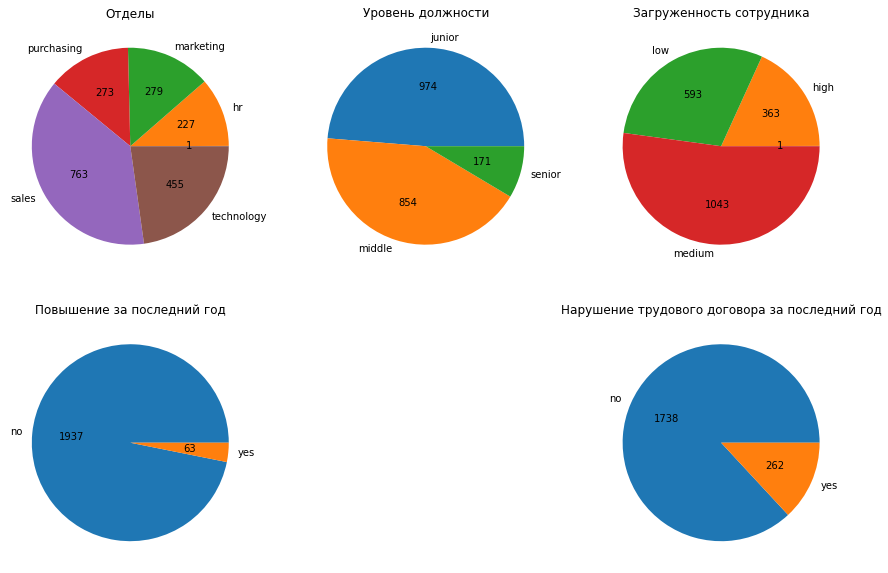

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.delaxes(axes[1, 1])

pie_plot(df_all, 'dept', axes[0, 0])
axes[0, 0].set_title('Отделы')
pie_plot(df_all, 'level', axes[0, 1])
axes[0, 1].set_title('Уровень должности')
pie_plot(df_all, 'workload', axes[0, 2])
axes[0, 2].set_title('Загруженность сотрудника')
pie_plot(df_all, 'last_year_promo', axes[1, 0])
axes[1, 0].set_title('Повышение за последний год')
pie_plot(df_all, 'last_year_violations', axes[1, 2])
axes[1, 2].set_title('Нарушение трудового договора за последний год');

**В отделах видна новая категория без названия, вероятно, это просто пропущенное значение, но обрабатывать мы его не будет, так как это тестовые данные.**

**Все данные почти идентичны. Корреляционный анализ в тестовых данных проводить смысла нет.**

## Подготовка данных и пайплайн

**Для начала создадим новую метрику под названием `SMAPE`(симметричное среднее абсолютное процентное отклонение):**
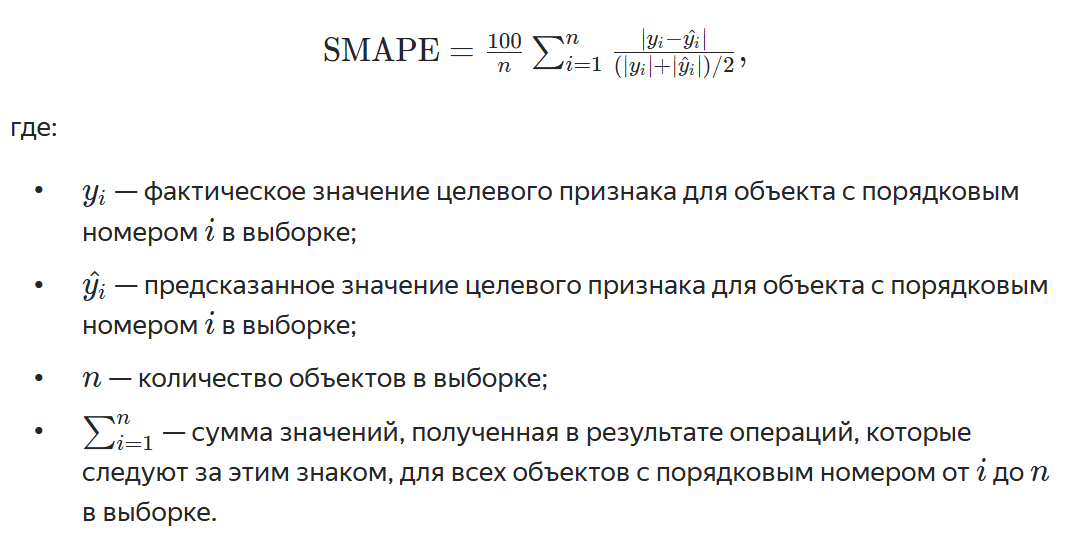
**Напишем функцию, которая принимает на вход массивы `NumPy` или объекты `Series` в pandas и возвращает значение метрики `SMAPE`. Используем эту метрику при подборе гиперпараметров и оценке качества моделей.**

In [25]:
def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    mask = denominator == 0
    denominator[mask] = 1
    smape_value = 100 * numerator / denominator
    smape_value[mask] = 0
    return np.mean(smape_value)

smape_scorer = make_scorer(smape, greater_is_better=False)

**Готово, диапазон значении `0%-200%`, чем меньше метрика, тем лучше модель.**

**Готово, теперь разделим данные на выборки и создадим пайплайн, который будет проверять 4 модели: `KNeighborsRegressor`, `DecisionTreeRegressor`, `LogisticRegression` и `SVR` с различными гипепараметрами, так же будем использовать два кодировщика:`OneHotEncoder` и `OrdinalEncoder` для категориальных признаков и три скейлера для масштабирования количественных:`RobustScaler`, `MinMaxScaler` и `StandardScaler`.**

In [26]:
X_train_1 = df_train_1.drop('job_satisfaction_rate', axis=1)
y_train_1 = df_train_1['job_satisfaction_rate']
df = df_test_all.join(df_test_1, how='inner')
X_test_1 = df.drop('job_satisfaction_rate', axis=1)
y_test_1 = df['job_satisfaction_rate']

In [27]:
num_col = ['salary']

ohe_col = ['dept']

ord_col = ['level',
           'workload',
           'last_year_promo',
           'last_year_violations',
           'employment_years',
           'supervisor_evaluation']

In [28]:
pipe_ohe = Pipeline([                         #пайплайн для кодирования
    ('replace_space', FunctionTransformer(lambda X: X.replace(' ', np.nan), validate=False)),
    ('simpleImputer_ohe_2', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

In [29]:
pipe_ord = Pipeline([                         #пайплайн для кодирования
    ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[
                                    ['junior', 'middle', 'senior'],
                                    ['low', 'medium', 'high'],
                                    ['no', 'yes'],
                                    ['no', 'yes'],
                                    list(range(1, 11)),
                                    [1, 2, 3, 4, 5]],
                         handle_unknown='use_encoded_value',
                         unknown_value = np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

In [30]:
RANDOM_STATE=42
data_preprocessor = ColumnTransformer([       #пайплайн для масштабирования и кодирования
    ('ohe', pipe_ohe, ohe_col),
    ('ord', pipe_ord, ord_col),
    ('num', MinMaxScaler(), num_col)],
    remainder = 'passthrough')

pipe_final = Pipeline([                       #итоговый пайплайн
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor)
])

param_grid_1 = [
    {
        'models': [KNeighborsRegressor()],
        'models__n_neighbors': range(2, 40),
        'models__weights': ['uniform', 'distance'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(3, 20),
        'models__min_samples_split': [2, 5, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVR()],
        'models__kernel': ['linear', 'rbf', 'poly'],
        'models__gamma': ['scale', 'auto', 0.01, 0.1],
        'models__degree': [2, 3, 4],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [31]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid_1,
    scoring=smape_scorer,
    cv=5,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

**Готово, теперь найдём лучшую модель.**

In [32]:
randomized_search.fit(X_train_1, y_train_1)

print('Лучшая модель:', randomized_search.best_estimator_)
print('Лучшие параметры:', randomized_search.best_params_)
print('Лучшая SMAPE (на валидации):', -randomized_search.best_score_)  # Обратите внимание на минус!

Лучшая модель: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('replace_space',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7f800c9028b0>)),
                                                                  ('simpleImputer_ohe_2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                      

In [33]:
y_test_pred_1 = randomized_search.predict(X_test_1)
display(f'Метрика SMAPE {smape(y_test_1, y_test_pred_1)}')
display(f'Лучшие параметры: {randomized_search.best_params_}')

'Метрика SMAPE 14.360842219581851'

"Лучшие параметры: {'preprocessor__num': StandardScaler(), 'models__min_samples_split': 2, 'models__max_depth': 15, 'models': DecisionTreeRegressor(random_state=42)}"

**Теперь выведем топ 10 лучших моделей.**

In [34]:
results = pd.DataFrame(randomized_search.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)
display('Топ 10 лучших моделей:')
results[['rank_test_score', 'mean_test_score', 'param_models']]
#pd.set_option('display.max_colwidth', None)

'Топ 10 лучших моделей:'

,rank_test_score,mean_test_score,param_models
9,1,-16.043463,DecisionTreeRegressor(random_state=42)
3,2,-16.641018,DecisionTreeRegressor(random_state=42)
4,3,-17.135130,KNeighborsRegressor()
7,4,-17.524189,KNeighborsRegressor()
2,5,-18.453040,DecisionTreeRegressor(random_state=42)
6,6,-19.053702,KNeighborsRegressor()
1,7,-19.516116,KNeighborsRegressor()
0,8,-20.385289,KNeighborsRegressor()
5,9,-31.448270,KNeighborsRegressor()
8,10,-39.889769,SVR()


**Метрика отличная - `14.38`:**

**Лучшая модель - `DecisionTreeRegressor`, в топ 10 выборку она попала `3 раза`, но лидер `kNN` - `6 раз`, но всё лучшая дерево решении. Гиперпараметры лучшей модели:**
- models__min_samples_split: `2`;
- models__max_depth: `15`;

# Задача 2 - вероятность увольнения

## Исследовательский анализ

**Взглянем на распределения каждого признака в тренировочном датафрейме.**

### Количественные признаки

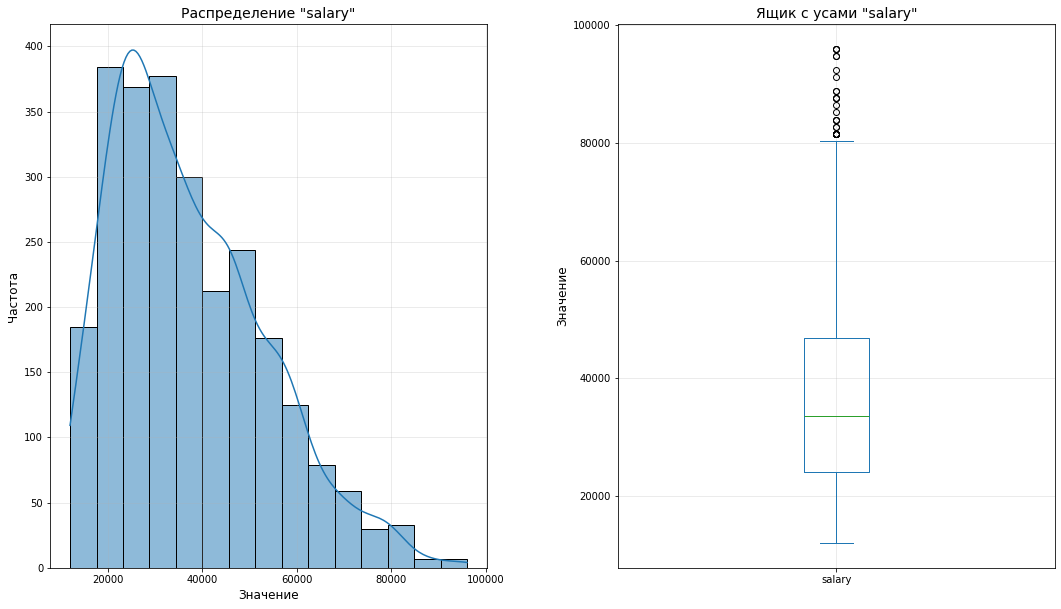

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plot_continuous(df_train_2, 'salary', axes[0], 15)

df_train_2[['salary']].plot.box(ax=axes[1], vert=True)
axes[1].set_title(f'Ящик с усами "salary"', fontsize=14)
axes[1].set_ylabel('Значение', fontsize=12)
axes[1].grid(alpha=0.3)

plt.show()

**Медианное значение ЗП - `33000`(в тестовых `30000`).**

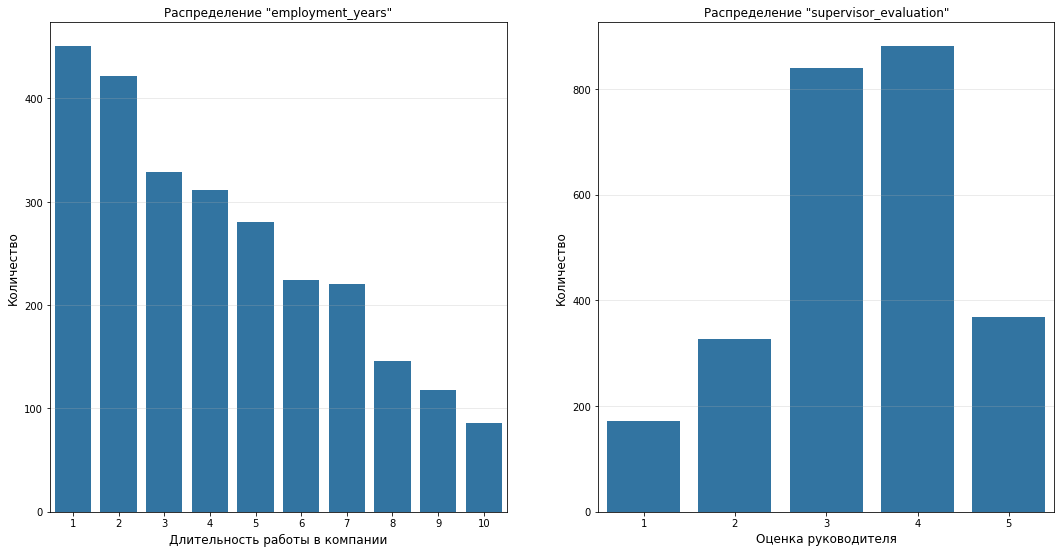

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

plot_discrete(df_train_2, 'employment_years', axes[0])
axes[0].set_xlabel('Длительность работы в компании', fontsize=12)
plot_discrete(df_train_2, 'supervisor_evaluation', axes[1])
axes[1].set_xlabel('Оценка руководителя', fontsize=12);

- Большинство сотрудников не долго находятся в компании: `1-4 года`;
- Самая частая оценка руководителя: `3-4`.

### Категоиральные признаки

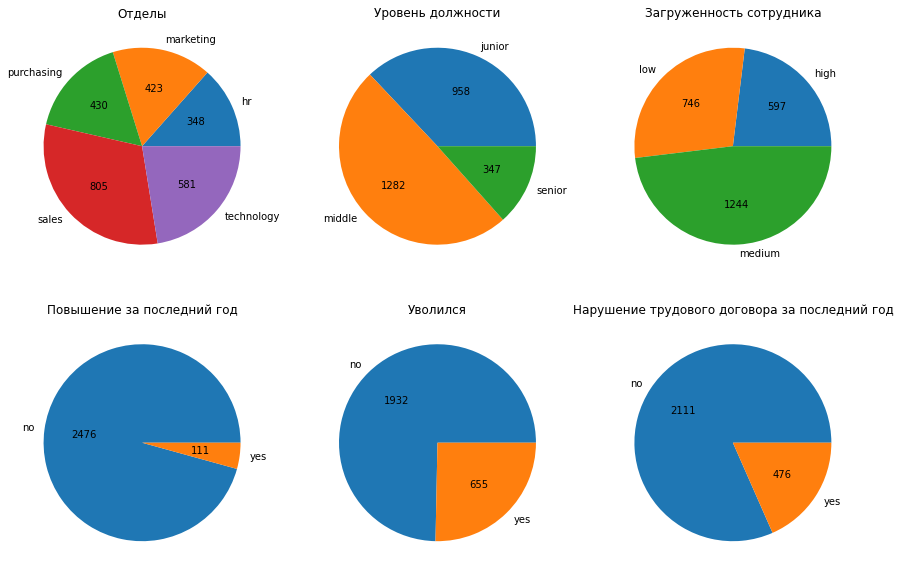

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

def pie_plot(df, column, ax):
    df_gr = df.groupby(column)[column].count()
    df_gr.plot(kind='pie',
               ylabel=(''),
               autopct=lambda x: '{:.0f}'.format(x * sum(df_gr.values)/100),
               ax=ax)

pie_plot(df_train_2, 'dept', axes[0, 0])
axes[0, 0].set_title('Отделы')
pie_plot(df_train_2, 'level', axes[0, 1])
axes[0, 1].set_title('Уровень должности')
pie_plot(df_train_2, 'workload', axes[0, 2])
axes[0, 2].set_title('Загруженность сотрудника')
pie_plot(df_train_2, 'last_year_promo', axes[1, 0])
axes[1, 0].set_title('Повышение за последний год')
pie_plot(df_train_2, 'quit', axes[1, 1])
axes[1, 1].set_title('Уволился')
pie_plot(df_train_2, 'last_year_violations', axes[1, 2])
axes[1, 2].set_title('Нарушение трудового договора за последний год');

- Самый большой отдел: `sales`:
- В основном в компании `middle`:
- Большинство сотрудников загружены на уровне `medium`:
- Из 2556 сотрудников за последний год повышение получили лишь `106` человек;
- `655` сотрудников уволились;
- `476` человек за последний год нарушили трудовой договор.

**Портрет среднестатистического сотрудника: ЗП - `33000`, довольны работой, находится в штате `1-4 года`, имеет оценку руководителя `3-4`, работает в отделе `sales` на должности `middle`, загружен на уровне `medium`, за последний год `не получал повышения` и `не нарушал трудовой договор`. Данные почти идентичны по отношению к тестовой выборке.**

### Портерт уволившегося сотрудника

**Посмотрим, в каком отделе работал уволившийся сотрудник, на сколько сильно был загружен, какую должность занимал и какую зарплату получал по сравнению с тем, кто остался.**

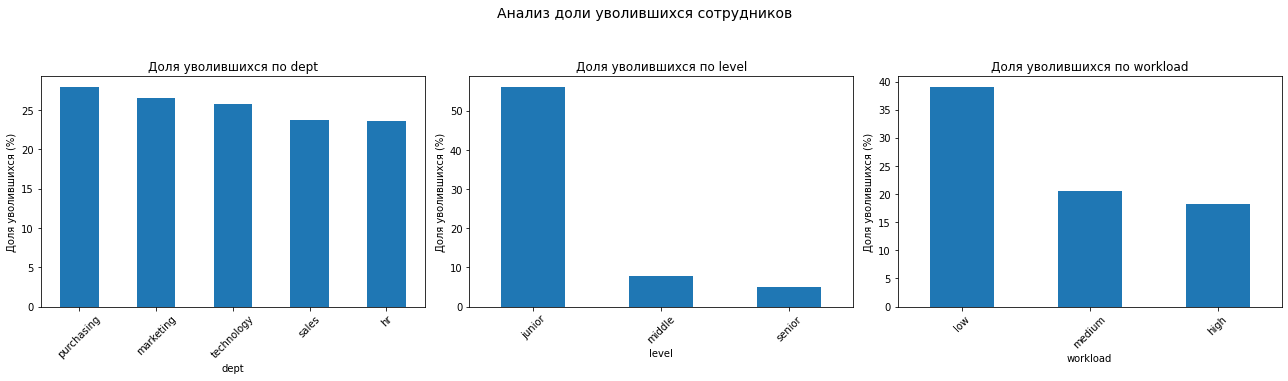

In [38]:
def plot_quit_rates(df, column, ax):
    total_counts = df_train_2.groupby(column).size()
    
    quit_counts = df_train_2[df_train_2['quit'] == 'yes'].groupby(column).size()
    
    quit_rates = (quit_counts / total_counts * 100)
    
    plot_df = quit_rates.reset_index()
    plot_df.columns = [column, 'quit_rate']
    
    plot_df = plot_df.sort_values('quit_rate', ascending=False)
    
    plot_df.plot(kind='bar', x=column, y='quit_rate', ax=ax, legend=False)
    ax.set_ylabel('Доля уволившихся (%)')
    ax.set_title(f'Доля уволившихся по {column}')
    ax.tick_params(axis='x', rotation=45)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_quit_rates(df_train_2, 'dept', axes[0])
plot_quit_rates(df_train_2, 'level', axes[1])
plot_quit_rates(df_train_2, 'workload', axes[2])
plt.suptitle('Анализ доли уволившихся сотрудников', y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

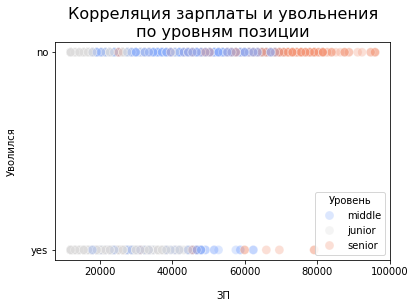

In [39]:
sns.scatterplot(
    data=df_train_2,
    x='salary',
    y='quit',
    hue='level',
    palette='coolwarm',
    s=80,
    alpha=0.3
)

plt.title('Корреляция зарплаты и увольнения\nпо уровням позиции', fontsize=16)
plt.xlabel('ЗП', labelpad=14)
plt.ylabel('Уволился', labelpad=14)

plt.legend(title='Уровень', frameon=True);

**Наибольший отток сотрудников идёт на уровне `junior` - самая начальная позиция, соответсвенно у них самая низкая зарплата, не будем обращать внимания на `moddle` и `senior` позиции, такие увольнения редкость. Даже имея низкую или среднюю загруженность, сотрудник всё равно увольняется. По отделам аномалии не обнаружены - увольнения примерно одинаковы везде в процентном соотношении.**

### Уровень удовлетворенности и увольнении

**Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение: визуализируем и сравним распределения признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников.**

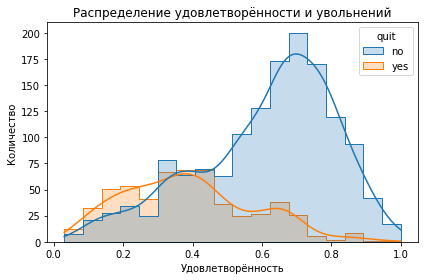

In [40]:
sns.histplot(data=df_all, x='job_satisfaction_rate', hue='quit',
             kde=True, element='step', common_norm=False,
             palette=['#1f77b4', '#ff7f0e'])
plt.title('Распределение удовлетворённости и увольнений')
plt.ylabel('Количество')
plt.xlabel('Удовлетворённость')
plt.tight_layout()
plt.show()

**Видна чёткая связь увольнений и неудовлетворённости сотрудников. В частности, сотрудники, которые довольны работой, остаются, в отличие от недовольных - большинство из них не довольны работой.**

## Подготовка данных и пайплайн

**Так как целевой признак `1 задачи` связан с целевым признаком `2 задачи`, добавим `job_satisfaction_rate`, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.**

In [41]:
X_train_2 = df_train_2.drop('quit', axis=1)
y_train_2 = df_train_2['quit']
X_test_2 = df_all.drop(['quit', 'job_satisfaction_rate'], axis=1)
y_test_2 = df_all['quit']

In [42]:
y_pred_1_2 = randomized_search.predict(X_train_2)
X_train_2['job_satisfaction_rate'] = y_pred_1_2
X_test_2['job_satisfaction_rate'] = y_test_pred_1

X_train_2.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0.656538
814010,sales,junior,medium,2,no,no,4,27600,0.851538
155091,purchasing,middle,medium,5,no,no,1,37200,0.380000
257132,sales,junior,medium,2,no,yes,3,24000,0.380000
910140,marketing,junior,medium,2,no,no,5,25200,0.690000


**Теперь подготовим пайплайн для задачи классификации, сильных различии с прошлым пайплайном не будет, поменялись только модели и метрика: `KNeighborsClassifier`, `DecisionTreeClassifier`, `LogisticRegression` и `SVC`, метрика - `ROC-AUC`.**

In [43]:
RANDOM_STATE=42

num_col = ['salary', 'job_satisfaction_rate']

le = LabelEncoder()
y_train_2 = le.fit_transform(y_train_2)
y_test_2 = le.transform(y_test_2)

data_preprocessor = ColumnTransformer([       #пайплайн для масштабирования и кодирования
    ('ohe', pipe_ohe, ohe_col),
    ('ord', pipe_ord, ord_col),
    ('num', MinMaxScaler(), num_col)],
    remainder = 'passthrough')

pipe_final = Pipeline([                       #итоговый пайплайн
    ('preprocessor', data_preprocessor),
    ('models', None)
])

param_grid_2 = [
    {
    'models': [KNeighborsClassifier()],
    'models__n_neighbors': range(2, 40),
    'models__weights': ['uniform', 'distance'],
#    'models__metric': ['euclidean', 'manhattan', 'cosine'],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
    'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
    'models__max_depth': range(3, 20),
    'models__min_samples_split': [2, 5, 10],
    'models__class_weight': ['balanced', None],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
    'models': [LogisticRegression(random_state=RANDOM_STATE)],
    'models__penalty': ['l1', 'l2'],
    'models__solver': ['liblinear', 'saga'],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
    'models': [SVC(random_state=RANDOM_STATE, probability=True)],
    'models__kernel': ['linear', 'rbf', 'poly'],
    'models__gamma': ['scale', 'auto', 0.01, 0.1],
    'models__degree': [2, 3, 4],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

**В данной задаче метрика будет `ROC_AUC`.**

In [44]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid_2,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

**Обучим модель.**

In [45]:
randomized_search.fit(X_train_2, y_train_2)
display(f'Лучшая модель:', randomized_search.best_estimator_)
display('Среднее значение метрики при кросс-валидации:', randomized_search.best_score_)

'Лучшая модель:'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('replace_space',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7f800c9028b0>)),
                                                                  ('simpleImputer_ohe_2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept']),
                                                 ('or...
                                                                                               3,
                                                                                               4,
                                                                                               5]],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload',
                                                   'last_year_promo',
                                                   'last_year_violations',
                                                   'employment_years',
                                                   'supervisor_evaluation']),
                                                 ('num', StandardScaler(),
                                                  ['salary',
                                                   'job_satisfaction_rate'])])),
                ('models', KNeighborsClassifier(n_neighbors=15))])

'Среднее значение метрики при кросс-валидации:'

np.float64(0.9041321800214488)

In [46]:
y_test_pred_2 = randomized_search.predict_proba(X_test_2)[:,1]
display(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_2, y_test_pred_2)}')
display(f'Лучшие параметры: {randomized_search.best_params_}')

'Метрика ROC-AUC на тестовой выборке: 0.916923487228116'

"Лучшие параметры: {'preprocessor__num': StandardScaler(), 'models__weights': 'uniform', 'models__n_neighbors': 15, 'models': KNeighborsClassifier()}"

**Метрика `ROC-AUC` довольно высокая - `0.92`, лучшая модель - kNN со следующими гиперпараметрами:**
- models__weights: `uniform`;
- models__n_neighbors: `15`.

# Общий вывод

**Мы провели большую работу, подведём краткие выводы о каждом шаге.**

**Во всех входных тренировочных данных было большое количество дубликатов и одно неизвестное значение, все эти моменты мы реализовали в пайплайнах, в случае, если предоставят новые данные, они корректно обработают все недостатки. Так же мы обнаружили неккоректно написанные данные в признаках(`sinior`, вместо `senior`), их уже обработали вручную.**

**Задача 1 - удовлетворенность сотрудников.**

**Портрет среднестатистического сотрудника(тренировочные данные): ЗП - `31000`, доволен работой, находится в штате `1-3 года`, имеет оценку руководителя `3-4`, работает в отделе `sales` на должности `middle` или `junior`, загружен на уровне `medium`, за последний год `не получал повышения` и `не нарушал трудовой договор`. Тренировочные абсолютно идентичны, не считая незначительных различии в ЗП - `30000`.**

**Мы создали пайплайн из 4 моделей: `KNeighborsRegressor`, `DecisionTreeRegressor`, `LogisticRegression` и `SVR` с различными гипепараметрами, использовали два кодировщика:`OneHotEncoder` и `OrdinalEncoder` для категориальных признаков и три скейлера для масштабирования количественных:`RobustScaler`, `MinMaxScaler` и `StandardScaler`. Создали свою метрику - `SMAPE` (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). Лучшей моделью оказалась `DecisionTreeRegressor` - метрика SMAPE `14.38` на тестовых данных, гиперпараметры модели:**
- models__min_samples_split: `2`;
- models__max_depth: `15`.

**Задача 2 - вероятность увольнения сотрудника.**

**Портрет среднестатистического сотрудника: ЗП - `33000`, доволен работой, находится в штате `1-4 года`, имеет оценку руководителя `3-4`, работает в отделе `sales` на должности `middle`, загружен на уровне `medium`, за последний год `не получал повышения` и `не нарушал трудовой договор`. Данные так же похожи на тестовые, основное раздичие так же в ЗП: `30000`.**

**Портрет уволившегося сотрудника: работает на уровне `junior`, низкая ЗП от `10000` до `40000`, низкая загруженность. Так же уточним, что увольнения по процентным соотношениям уходят со всех отделов одинаково - `~25%`.**

**Проверили и убедились, что уровень удовлетворённости влияет на увольнение, чем выше удовлетворённость, тем меньше увольнении.**

**Для второй задачи мы создали похожий пайплайн, поменялись только модели: `KNeighborsClassifier`, `DecisionTreeClassifier`, `LogisticRegression` и `SVC`. Лучшей моделью оказался метод ближайших соседей `kNN` - метрика `ROC_AUC` показала `92.00` на тестовых данных, гиперпараметры модели:**
- models__weights: `uniform`
- models__n_neighbors: `15`.

**Предлагаю бизнесу подробнее рассмотреть сотрудников, которые находятся на уровне `junior`, есть вероятность, что молодые сотрудники сталкиваются с большими моральными проблемами во время работы(возможно, нужно нанять психолога, так же стоит супервайзерам относиться более лояльно к молодым специалистам). Либо, сотрудники, получив достаточный опыт переходят в другую компанию с более большими ЗП, стоит более строже отбирать кандидатов, и, если есть возможность - индексировать их ЗП  раз в пол года.**